In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-62.26850230700715 -129.34739756864127
67.70472392931916 -61.26711989300345
-51.73031044539522 -178.40948299000104
-16.116439279914502 -77.50622617282171
16.375411437101505 -169.46510974445522
-47.14734846347305 -41.37592753041926
18.834687023769717 -126.25786496565418
14.059134032708144 4.1891117485032225
-7.616451991136287 170.840422410374
-78.1888813424402 71.91580874926476
-52.77802416019872 16.178500993450342
-77.99764251592728 54.07834720936259
13.011098219185854 32.99515076441887
69.40911497161693 -11.528511270136534
10.937450043567367 66.44987073924932
-20.975721387868745 -171.63499799942085
-84.7655874627905 -160.48492441622818
-22.8641214055004 82.26402334504445
-79.81488046172403 5.9875536570568215
82.33630155887266 81.5601392502677
-33.026235810154155 -177.26722289778047
-17.951601318373775 -143.87025104354603
-4.516069874836759 41.926837157784576
-65.38074182756782 -151.12469930859436
-46.857439708225726 65.60583020032442
8.090680273083692 116.11695350780184
42.90610879577

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25ecde87e3631e9c881b723607d9551c


In [39]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Country": city_country,
                          "Date": city_date,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | pangnirtung
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | marcona
City not found. Skipping...
Processing Record 5 of Set 1 | kapaa
Processing Record 6 of Set 1 | chuy
Processing Record 7 of Set 1 | guerrero negro
Processing Record 8 of Set 1 | dogondoutchi
Processing Record 9 of Set 1 | lolua
City not found. Skipping...
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | east london
Processing Record 13 of Set 1 | rabak
Processing Record 14 of Set 1 | hofn
Processing Record 15 of Set 1 | kavaratti
Processing Record 16 of Set 1 | alofi
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | hithadhoo
Processing Record 19 of Set 1 | dikson
Processing Record 20 of Set 1 | tautira
Processing Record 21 of Set 1 | micheweni
Processing Re

Processing Record 38 of Set 4 | mumford
Processing Record 39 of Set 4 | bahia honda
Processing Record 40 of Set 4 | husavik
Processing Record 41 of Set 4 | asandh
Processing Record 42 of Set 4 | port elizabeth
Processing Record 43 of Set 4 | georgetown
Processing Record 44 of Set 4 | makow mazowiecki
Processing Record 45 of Set 4 | brae
Processing Record 46 of Set 4 | batagay-alyta
Processing Record 47 of Set 4 | namibe
Processing Record 48 of Set 4 | panguna
Processing Record 49 of Set 4 | madimba
Processing Record 50 of Set 4 | mount gambier
Processing Record 1 of Set 5 | mabaruma
Processing Record 2 of Set 5 | sukhumi
Processing Record 3 of Set 5 | lompoc
Processing Record 4 of Set 5 | sola
Processing Record 5 of Set 5 | phuket
Processing Record 6 of Set 5 | florianopolis
Processing Record 7 of Set 5 | san rafael
Processing Record 8 of Set 5 | amalapuram
Processing Record 9 of Set 5 | vilhena
Processing Record 10 of Set 5 | cam ranh
Processing Record 11 of Set 5 | ulladulla
Processi

Processing Record 26 of Set 8 | emba
Processing Record 27 of Set 8 | wenchi
Processing Record 28 of Set 8 | touros
Processing Record 29 of Set 8 | hanzhong
Processing Record 30 of Set 8 | plouzane
Processing Record 31 of Set 8 | chortomlyk
Processing Record 32 of Set 8 | samusu
City not found. Skipping...
Processing Record 33 of Set 8 | sambava
Processing Record 34 of Set 8 | fengrun
Processing Record 35 of Set 8 | darnah
Processing Record 36 of Set 8 | aba
Processing Record 37 of Set 8 | clovis
Processing Record 38 of Set 8 | katsuura
Processing Record 39 of Set 8 | beian
Processing Record 40 of Set 8 | santa catarina de tepehuanes
Processing Record 41 of Set 8 | clinton
Processing Record 42 of Set 8 | yamada
Processing Record 43 of Set 8 | upernavik
Processing Record 44 of Set 8 | chara
Processing Record 45 of Set 8 | mountain home
Processing Record 46 of Set 8 | pringsewu
Processing Record 47 of Set 8 | awjilah
Processing Record 48 of Set 8 | zhezkazgan
Processing Record 49 of Set 8

Processing Record 16 of Set 12 | byron bay
Processing Record 17 of Set 12 | yerbogachen
Processing Record 18 of Set 12 | el tigre
Processing Record 19 of Set 12 | bahawalpur
Processing Record 20 of Set 12 | enkhuizen
Processing Record 21 of Set 12 | sangar
Processing Record 22 of Set 12 | orlik
Processing Record 23 of Set 12 | comodoro rivadavia
Processing Record 24 of Set 12 | tabas
Processing Record 25 of Set 12 | marsa matruh
Processing Record 26 of Set 12 | peruibe
Processing Record 27 of Set 12 | bathsheba
Processing Record 28 of Set 12 | sao miguel do araguaia
Processing Record 29 of Set 12 | kempsey
Processing Record 30 of Set 12 | sindor
Processing Record 31 of Set 12 | tricase
Processing Record 32 of Set 12 | nortelandia
Processing Record 33 of Set 12 | kamina
Processing Record 34 of Set 12 | mikhaylovka
Processing Record 35 of Set 12 | dunedin
Processing Record 36 of Set 12 | kamen-rybolov
Processing Record 37 of Set 12 | palora
Processing Record 38 of Set 12 | oksfjord
Proce

In [40]:
len(city_data)

560

In [41]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2021-01-29 21:48:05,-23.1203,-134.9692,80.11,67,88,7.54
1,Pangnirtung,CA,2021-01-29 21:48:05,66.1451,-65.7125,-9.40,77,1,2.30
2,Vaini,TO,2021-01-29 21:48:06,-21.2000,-175.2000,77.00,94,90,9.22
3,Kapaa,US,2021-01-29 21:48:06,22.0752,-159.3190,75.20,69,40,19.57
4,Chuy,UY,2021-01-29 21:48:06,-33.6971,-53.4616,74.93,74,2,6.11
5,Guerrero Negro,MX,2021-01-29 21:46:26,27.9769,-114.0611,66.67,57,0,16.20
6,Dogondoutchi,NE,2021-01-29 21:48:06,13.6393,4.0287,73.58,20,0,10.63
7,Hermanus,ZA,2021-01-29 21:48:07,-34.4187,19.2345,60.01,90,87,3.69
8,East London,ZA,2021-01-29 21:48:07,-33.0153,27.9116,71.42,65,13,2.21
9,Rabak,SD,2021-01-29 21:48:07,13.1809,32.7400,72.37,19,0,17.43


In [44]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [45]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

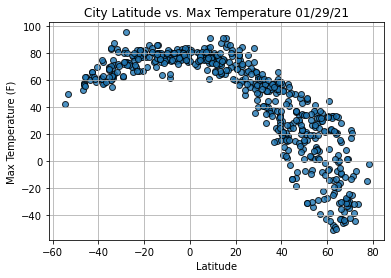

In [46]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

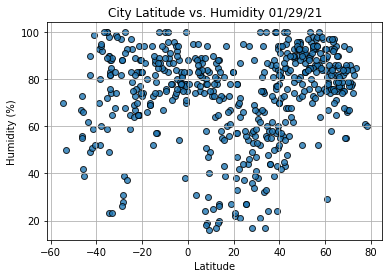

In [47]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

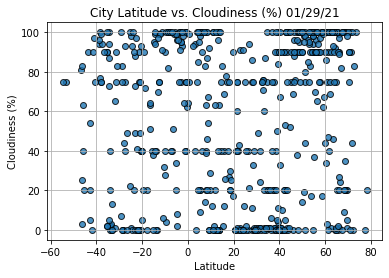

In [48]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

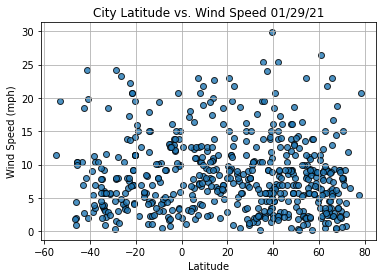

In [49]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [51]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [52]:
index13 = city_data_df.loc[13]

In [53]:
index13 = city_data_df.loc[13]
index13

City                      Mataura
Country                        NZ
Date          2021-01-29 21:48:08
Lat                      -46.1927
Lng                       168.864
Max Temp                    58.39
Humidity                       56
Cloudiness                     25
Wind Speed                   1.97
Name: 13, dtype: object

In [54]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3       True
4      False
       ...  
555     True
556     True
557     True
558     True
559    False
Name: Lat, Length: 560, dtype: bool

In [55]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Pangnirtung,CA,2021-01-29 21:48:05,66.1451,-65.7125,-9.40,77,1,2.30
3,Kapaa,US,2021-01-29 21:48:06,22.0752,-159.3190,75.20,69,40,19.57
5,Guerrero Negro,MX,2021-01-29 21:46:26,27.9769,-114.0611,66.67,57,0,16.20
6,Dogondoutchi,NE,2021-01-29 21:48:06,13.6393,4.0287,73.58,20,0,10.63
9,Rabak,SD,2021-01-29 21:48:07,13.1809,32.7400,72.37,19,0,17.43


In [56]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

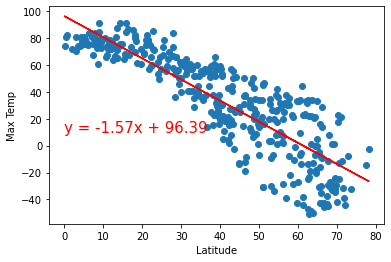

In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(0,10))

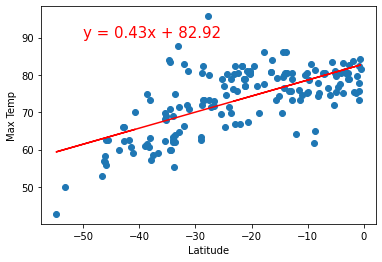

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature", 'Max Temp',(-50,90))

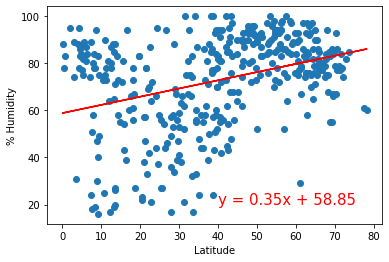

In [68]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,20))

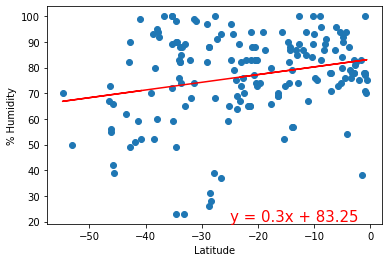

In [73]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-25,20))

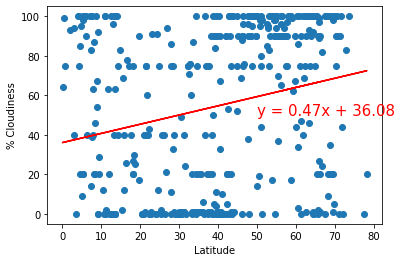

In [76]:
# Linear regression on the Northern Hemisphere Cloud
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(50,50))

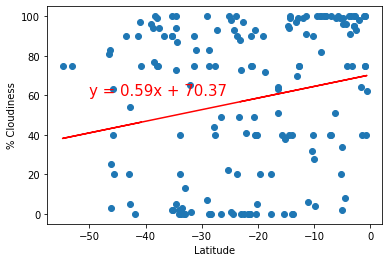

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

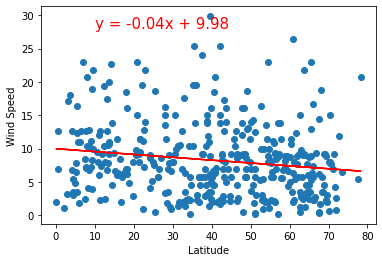

In [84]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(10,28))

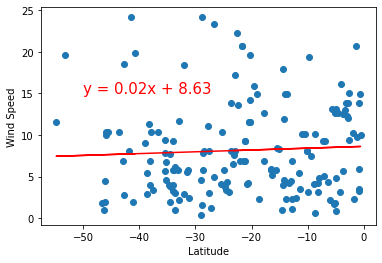

In [86]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,15))